In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import countDistinct

In [2]:
spark = SparkSession.builder.appName("DataManipulation").getOrCreate()

23/11/05 21:48:44 WARN Utils: Your hostname, codespaces-fd919a resolves to a loopback address: 127.0.0.1; using 172.16.5.4 instead (on interface eth0)
23/11/05 21:48:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/05 21:48:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.csv("ranking.csv", header=True, escape='"')

In [4]:
df.show(10, 0)

+---------------+-------------------------------------+--------------+-------------+-----------------------+---------------------+-----------------+-------------+--------------+--------------+---------------+---------------------+---------------------------+
|University Rank|Name of University                   |Location      |No of student|No of student per staff|International Student|Female:Male Ratio|OverAll Score|Teaching Score|Research Score|Citations Score|Industry Income Score|International Outlook Score|
+---------------+-------------------------------------+--------------+-------------+-----------------------+---------------------+-----------------+-------------+--------------+--------------+---------------+---------------------+---------------------------+
|1              |University of Oxford                 |United Kingdom|20,965       |10.6                   |42%                  |48 : 52          |96.4         |92.3          |99.7          |99.0           |74.9           

In [5]:
# distinct location count
df.select("Location").distinct().count()

14

In [6]:
df.groupBy("Location").agg(
    countDistinct("Name of University").alias("country_count")
).show()

+--------------+-------------+
|      Location|country_count|
+--------------+-------------+
|        Sweden|            1|
|     Singapore|            1|
|       Germany|            6|
|        France|            4|
|          NULL|           26|
| United States|           34|
|         China|            3|
|   South Korea|            2|
|   Switzerland|            4|
|        Canada|            2|
|         Japan|            2|
|     Australia|            4|
|United Kingdom|            7|
|   Netherlands|            4|
+--------------+-------------+



In [7]:
df.printSchema()

root
 |-- University Rank: string (nullable = true)
 |-- Name of University: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- No of student: string (nullable = true)
 |-- No of student per staff: string (nullable = true)
 |-- International Student: string (nullable = true)
 |-- Female:Male Ratio: string (nullable = true)
 |-- OverAll Score: string (nullable = true)
 |-- Teaching Score: string (nullable = true)
 |-- Research Score: string (nullable = true)
 |-- Citations Score: string (nullable = true)
 |-- Industry Income Score: string (nullable = true)
 |-- International Outlook Score: string (nullable = true)



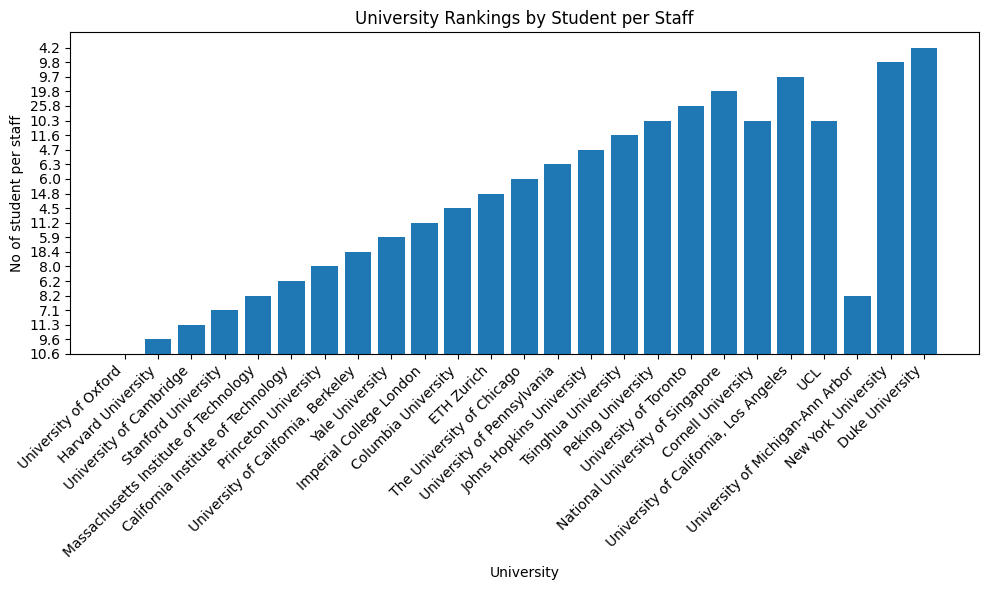

In [8]:
df_pandas = df.toPandas()
df_pandas = df_pandas.head(25)
# Plotting the data using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df_pandas["Name of University"], df_pandas["No of student per staff"])
plt.xlabel("University")
plt.ylabel("No of student per staff")
plt.title("University Rankings by Student per Staff")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot or save it to a file
plt.show()